In [1]:
import tensorflow as tf
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

print(tf.__version__)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

2.9.1
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 SUPER, compute capability 7.5


In [2]:
data_dir = os.path.join('.', 'data', 'Panama_Electricity_Consimpution')

df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
print(df.shape)
df.info()

(43775, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43775 entries, 0 to 43774
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    43775 non-null  object 
 1   nat_demand  43775 non-null  float64
 2   T2M_toc     43775 non-null  float64
 3   QV2M_toc    43775 non-null  float64
 4   TQL_toc     43775 non-null  float64
 5   W2M_toc     43775 non-null  float64
 6   T2M_san     43775 non-null  float64
 7   QV2M_san    43775 non-null  float64
 8   TQL_san     43775 non-null  float64
 9   W2M_san     43775 non-null  float64
 10  T2M_dav     43775 non-null  float64
 11  QV2M_dav    43775 non-null  float64
 12  TQL_dav     43775 non-null  float64
 13  W2M_dav     43775 non-null  float64
 14  Holiday_ID  43775 non-null  int64  
 15  holiday     43775 non-null  int64  
 16  school      43775 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 5.7+ MB


In [3]:
df.tail()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
43770,31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0
43771,31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0
43772,31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0
43773,31-12-2019 22:00,1130.4575,26.166895,0.017965,0.018486,13.420656,24.112207,0.017393,0.020386,3.872397,22.862207,0.016401,0.055557,3.843736,22,1,0
43774,31-12-2019 23:00,1084.4737,25.976373,0.018072,0.023315,13.749788,23.663873,0.017156,0.019531,4.165276,22.726373,0.016302,0.061371,3.793209,22,1,0


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


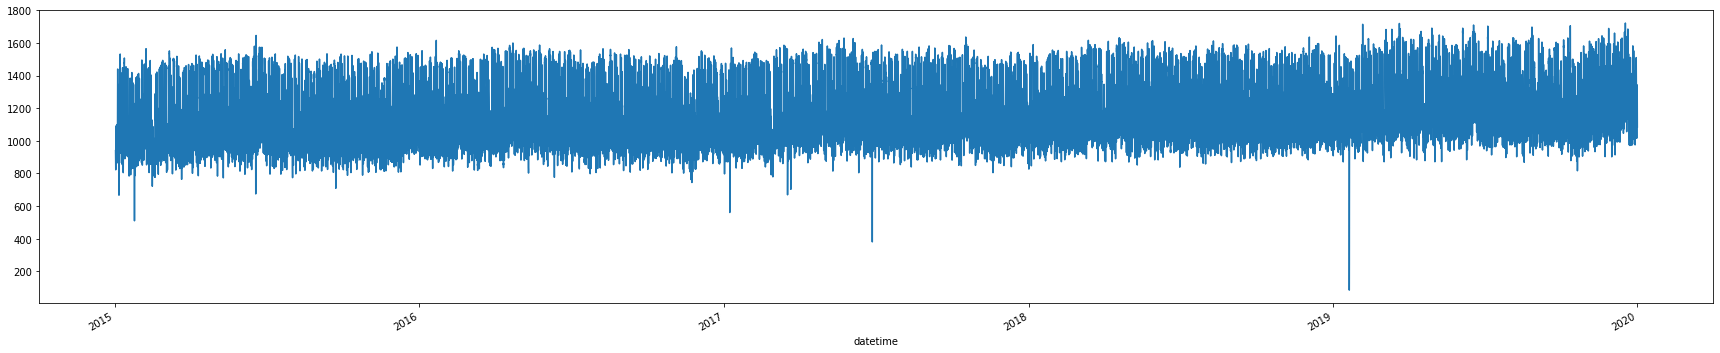

In [5]:
plt.figure(figsize=(30, 6))
df.groupby('datetime')['nat_demand'].median().plot()
plt.show()

In [14]:
scalers = {}
unshifted_feeds = ['datetime','school', 'holiday', 'Holiday_ID', 'nat_demand']
for col in df.columns:
    if col not in unshifted_feeds:
        scaler = MinMaxScaler()
        df[col] = scaler.fit_transform(df[[col]])
        scalers[col] = scaler

scalers

{'T2M_toc': MinMaxScaler(),
 'QV2M_toc': MinMaxScaler(),
 'TQL_toc': MinMaxScaler(),
 'W2M_toc': MinMaxScaler(),
 'T2M_san': MinMaxScaler(),
 'QV2M_san': MinMaxScaler(),
 'TQL_san': MinMaxScaler(),
 'W2M_san': MinMaxScaler(),
 'T2M_dav': MinMaxScaler(),
 'QV2M_dav': MinMaxScaler(),
 'TQL_dav': MinMaxScaler(),
 'W2M_dav': MinMaxScaler()}

In [15]:
df.tail()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
43771,2019-12-31 20:00:00,1250.9634,0.756172,0.800437,0.028227,0.342697,0.634081,0.807806,0.121303,0.147381,0.680525,0.792325,0.134709,0.405444,22,1,0
43772,2019-12-31 21:00:00,1193.6802,0.752134,0.792393,0.026544,0.342653,0.626659,0.799860,0.078513,0.151856,0.673422,0.786892,0.113567,0.393170,22,1,0
43773,2019-12-31 22:00:00,1130.4575,0.746781,0.791739,0.035465,0.342104,0.617258,0.790174,0.042016,0.156078,0.668169,0.782544,0.116281,0.373581,22,1,0
43774,2019-12-31 23:00:00,1084.4737,0.741344,0.796451,0.044731,0.350494,0.605781,0.779434,0.040254,0.168069,0.664199,0.777817,0.128449,0.368670,22,1,0
43775,2020-01-01 00:00:00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0,0,1


In [40]:
def dataframe_splitter(data, test_ratio=0.2):
    total = len(data)
    train_size = int(total - (total * test_ratio))
    
    train_data = data.iloc[:train_size, :]
    test_data = data.iloc[train_size:, :]
    return train_size, train_data, test_data

In [41]:
SPLIT_RATIO=0.05
WINDOW_SIZE = 24
BATCH_SIZE = 32
BUFFER_SIZE = 2e4
EPOCHS = 250
PATIENCE = 5
MONITOR = 'val_loss'

In [43]:
split_time, df_train, df_valid = series_splitter(df, SPLIT_RATIO)
print(df_train.shape, df_valid.shape,)

(41587, 17) (2189, 17)


In [22]:
def plot_series(time, series, format="-", start=0, end=None, title=None, xlabel=None, ylabel=None, legend=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

        for series_num in series:
            # Plot the time series data
            plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

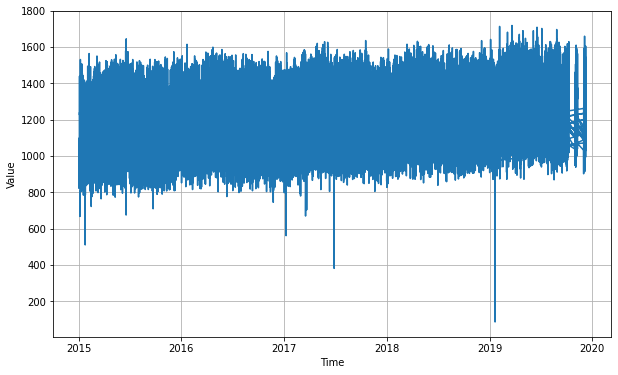

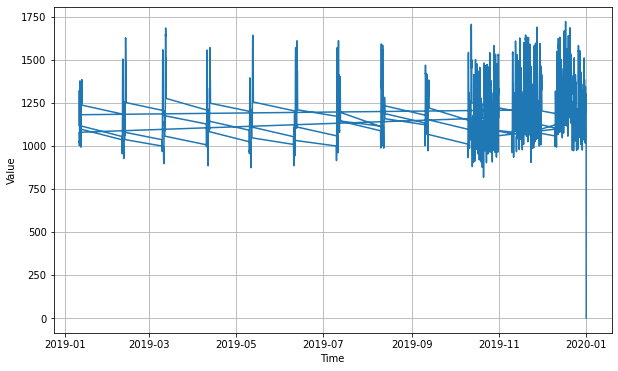

In [24]:
plot_series(x_train['datetime'], y_train, format="-", start=0, end=None, title=None, xlabel=None, ylabel=None, legend=None)
plot_series(x_valid['datetime'], y_valid, format="-", start=0, end=None, title=None, xlabel=None, ylabel=None, legend=None)

In [39]:
# x_train = x_train.set_index('datetime')
# x_valid = x_valid.set_index('datetime')

# Generate the dataset windows
train_dataset = windowed_dataset(
    x_train, 
    y_train,
    WINDOW_SIZE, 
    BATCH_SIZE, 
    shuffle_buffer=BUFFER_SIZE,
)
test_dataset = windowed_dataset(
    x_valid, 
    y_valid,
    WINDOW_SIZE, 
    BATCH_SIZE, 
    shuffle_buffer=BUFFER_SIZE,
)

print(train_dataset, test_dataset)

# Print shapes of feature and label
for window in train_dataset.take(1):
    print(f'shape of feature: {window[0].shape}')
    print(f'shape of label: {window[1].shape}')

<TensorSliceDataset element_spec=TensorSpec(shape=(15,), dtype=tf.float64, name=None)> <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float64, name=None)>
<ZipDataset element_spec=(TensorSpec(shape=(15,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>


TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.<lambda>() takes 1 positional argument but 2 were given
